In [2]:
import torch
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from dataloader import get_train_and_validation_dataloader, patch_extractor
import ewtpy

In [3]:
# Creating of Patch Extractor.
from data_importer import load_testing_images
from data_importer import load_training_images, denormalize, trunc

import matplotlib.pyplot as plt


# Common testing image pairs (used to evaluate all models)

noisy_images, ground_truth_images = load_training_images('../../../../Dataset/LowDoseCTGrandChallenge/Training_Image_Data', load_limited_images=True, num_images_to_load=1)

_n, _g = load_training_images('../../../../Dataset/LowDoseCTGrandChallenge/Selected_Image_Pairs/', load_limited_images=False)
noisy_images = np.concatenate((noisy_images, _n), axis=0)
ground_truth_images = np.concatenate((ground_truth_images, _g), axis=0)

noisy_images = np.squeeze(noisy_images, axis=-1)
ground_truth_images = np.squeeze(ground_truth_images, axis=-1)

loaded training images x and y of len :  1 1  respectively
type of train images x :  float64
range of values in train images :  0.0 0.576171875
type of train images y :  float64
loaded training images x and y of len :  3 3  respectively
type of train images x :  float64
range of values in train images :  0.0 0.654541015625
type of train images y :  float64


(512, 512)
(2, 512, 512)
Done
Plotting results... 

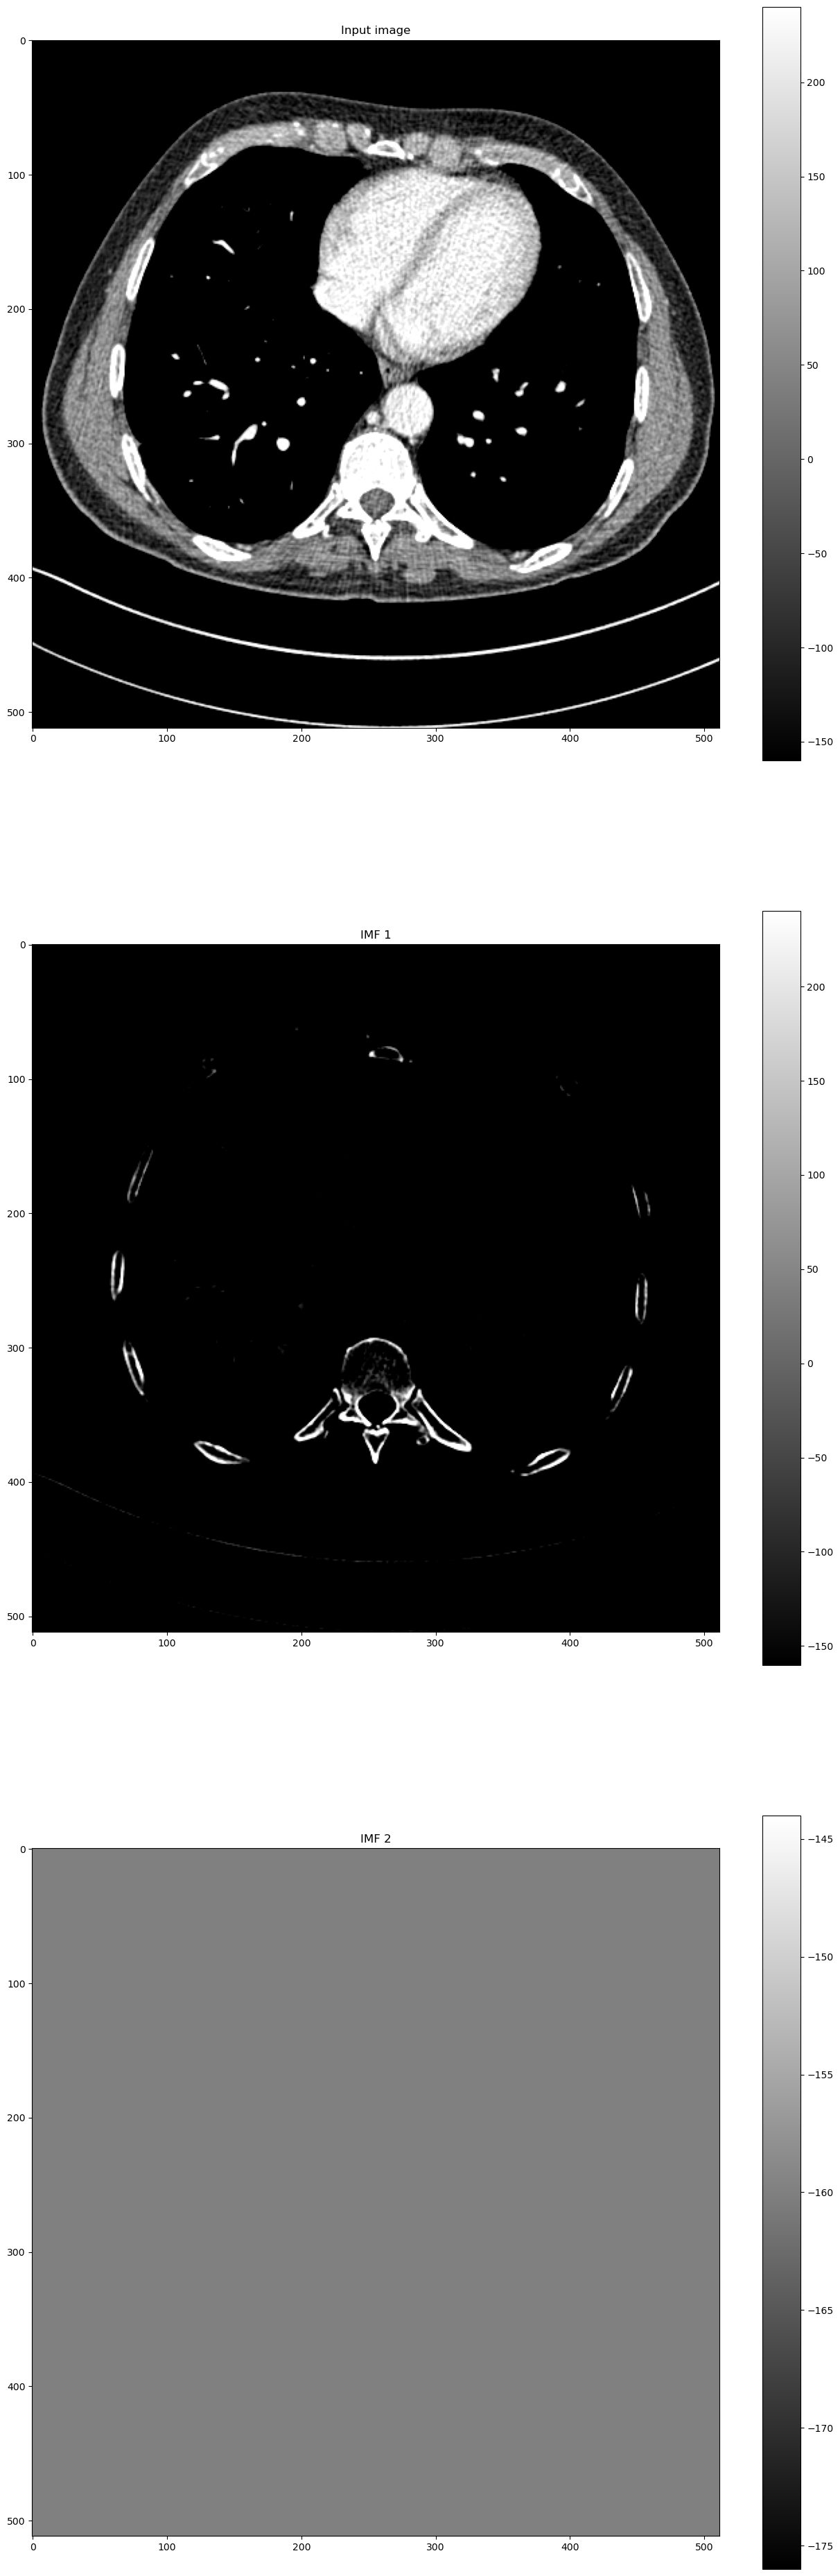

In [4]:
import torch
from pytorch_wavelets import DTCWTForward, DTCWTInverse
from pyemd.EMD2d import EMD2D

img = ground_truth_images
print(img[0].shape)

emd2d = EMD2D().emd(img[0])
print(emd2d.shape)

imfNo = emd2d.shape[0]
print("Done")

print("Plotting results... ", end="")

# Save image for preview
plt.figure(figsize=(16, 16 * (imfNo + 1)))
plt.subplot(imfNo + 1, 1, 1)
plt.imshow(trunc(denormalize(img[0])), cmap='gray')
plt.colorbar()
plt.title("Input image")

# Save reconstruction
for n, imf in enumerate(emd2d):
    plt.subplot(imfNo + 1, 1, n + 2)
    plt.imshow(trunc(denormalize(imf)), cmap='gray')
    plt.colorbar()
    plt.title("IMF %i" % (n + 1))

(512, 512)
(2, 512, 512)
Done
Plotting results... 

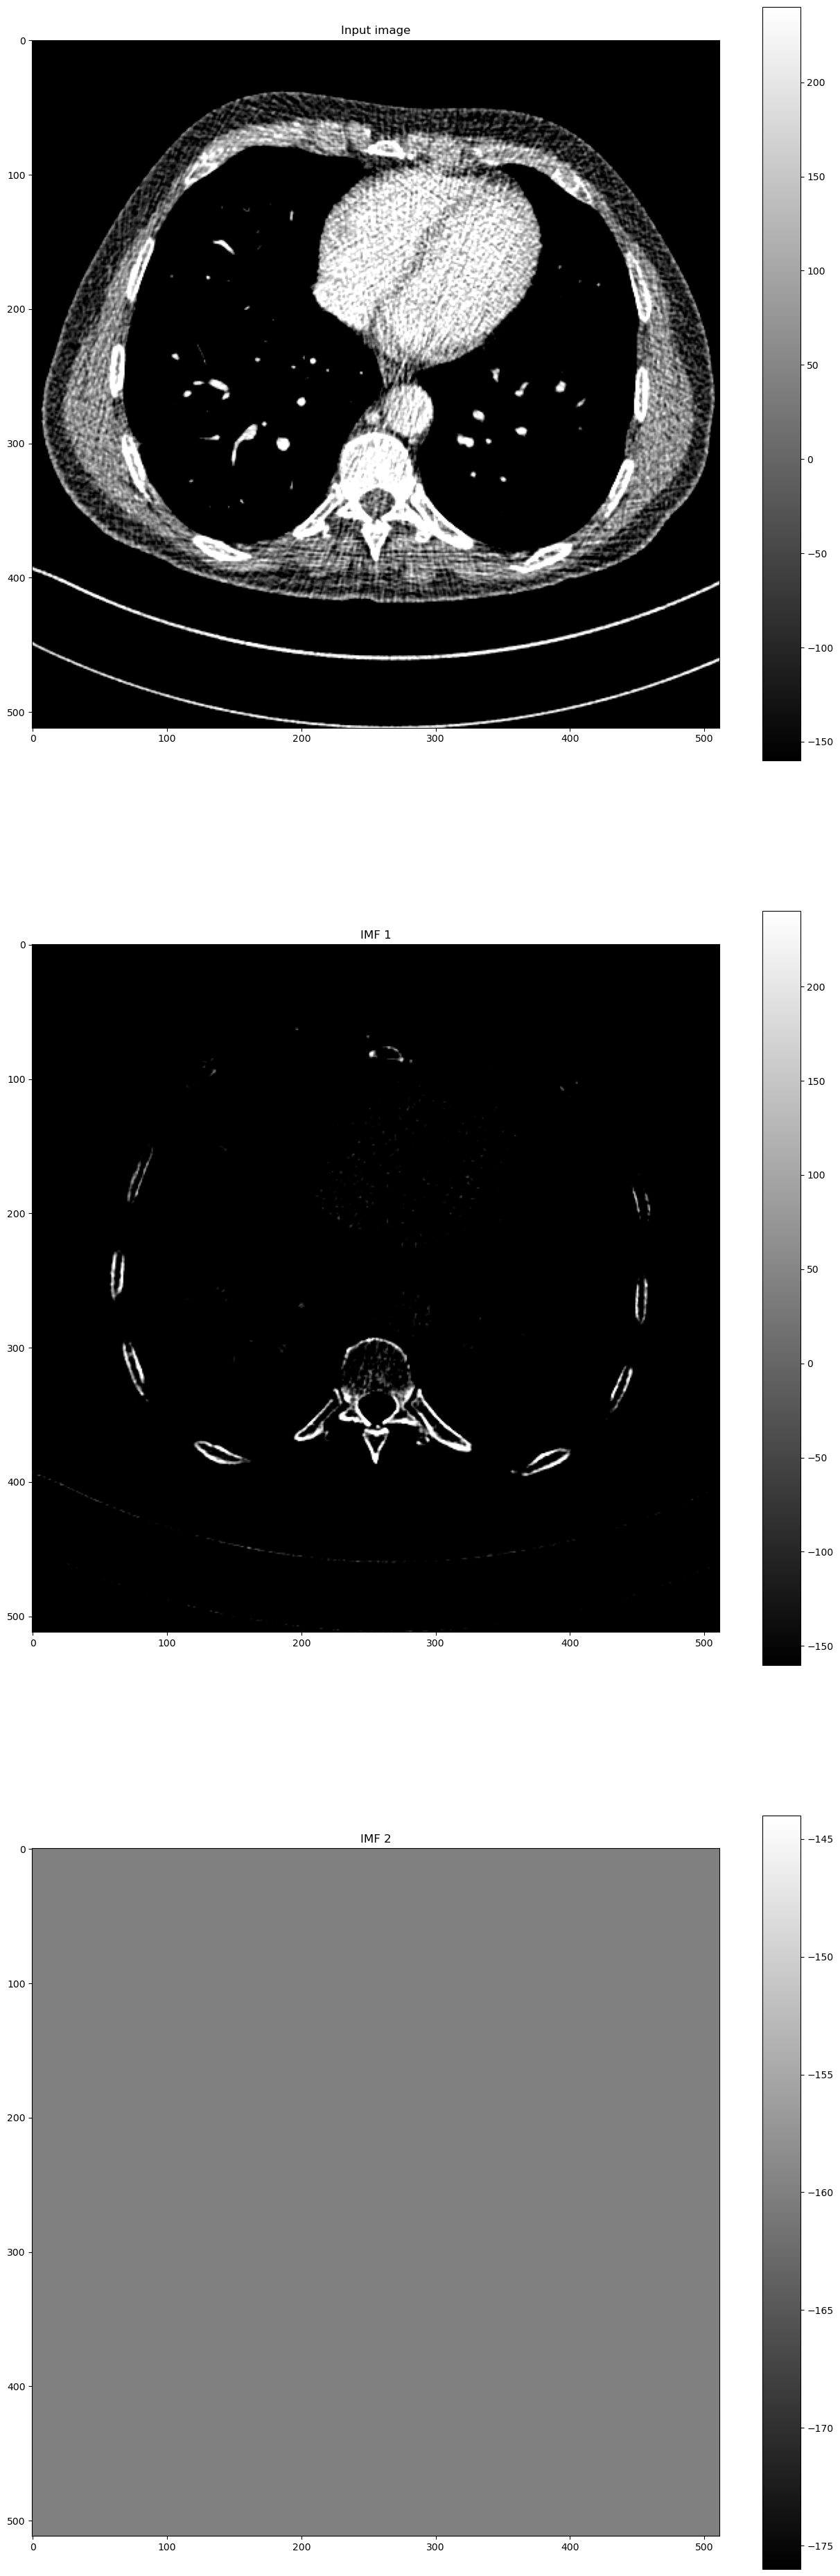

In [5]:

import torch
from pytorch_wavelets import DTCWTForward, DTCWTInverse
from pyemd.EMD2d import EMD2D

img = noisy_images
print(img[0].shape)

emd2d = EMD2D().emd(img[0])
print(emd2d.shape)

imfNo = emd2d.shape[0]
print("Done")

print("Plotting results... ", end="")

# Save image for preview
plt.figure(figsize=(16, 16 * (imfNo + 1)))
plt.subplot(imfNo + 1, 1, 1)
plt.imshow(trunc(denormalize(img[0])), cmap='gray')
plt.colorbar()
plt.title("Input image")

# Save reconstruction
for n, imf in enumerate(emd2d):
    plt.subplot(imfNo + 1, 1, n + 2)
    plt.imshow(trunc(denormalize(imf)), cmap='gray')
    plt.colorbar()
    plt.title("IMF %i" % (n + 1))